# Bike dataset

In [ ]:
# !pip install bqplot

Import the required libraries

In [1]:
import numpy as np
import pandas as pd

from bqplot import pyplot as plt
from bqplot.interacts import BrushIntervalSelector
from bqplot import Bars, Axis, LinearScale, OrdinalScale, Figure

from ipywidgets import Layout, HTML, VBox

In [2]:
!jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension enable --py --sys-prefix bqplot

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Enabling notebook extension bqplot/extension...
      - Validating: ok


 I used the dataset from https://github.com/ipython-books/cookbook-2nd/blob/master/chapter01_basic/02_pandas.md, which is a tutorial is used. The dataset is on the attendance on Montreal's bicycle tracks. The approach below is inspired on the tutorial.

In [3]:
url = ("https://raw.githubusercontent.com/"
       "ipython-books/cookbook-2nd-data/"
       "master/bikes.csv")

Download, clean and inspect the data

In [4]:
df = pd.read_csv(url, index_col='Date', parse_dates=True, dayfirst=True)
df.drop('Unnamed: 1', axis = 1, inplace=True)
bike_names = df.columns.values

In [5]:
df.head()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,
2013-01-01,0,0,1,0,6,0,1,0
2013-01-02,69,0,13,0,18,0,2,0
2013-01-03,69,2,21,6,22,1,0,0
2013-01-04,80,0,22,4,16,0,125,0
2013-01-05,52,4,19,3,12,0,97,0


The built-in functionality of pandas provide some easy plotting functionality like the plots below. The graph shows the total attendance on all the bike tracks, throughout the time period. The barplot shows the distribution of the attendance over the bike tracks. However, when you want to do some more intuitive data exploration the basic plotting functions can be limited.

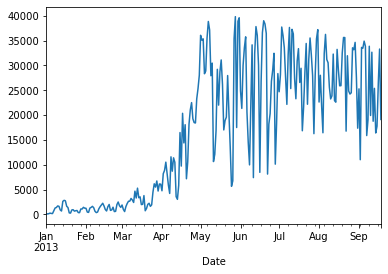

In [6]:
df.sum(axis=1).plot();

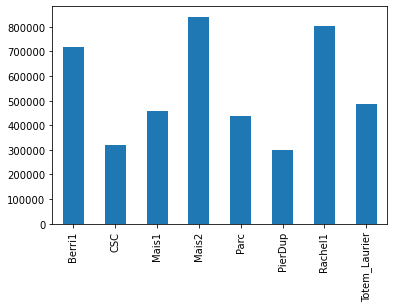

In [7]:
df.sum(axis=0).plot.bar();

That is why I decided to use bqplot, this allows for some interactive plotting and is easy to use in combination with the IPython widgets. Below I will create the same plots as above, but link them together so that you can select a certain time frame in the graph and the bar plot will adjust to the selected time interval, without having to adjust code.

Get the required data

In [8]:
df['dayrange'] = np.arange(len(df.index))
bikes_day = df.loc[:, df.columns != 'dayrange'].sum(axis=1).values
days = np.asarray(df.index.values)

Initialize a line plot (similar to the one above) in bqplot

In [9]:
fig_layout = Layout(width='900px', height='500px')
bike_figure = plt.figure(layout = fig_layout)
bike_line= plt.plot(days, bikes_day)
plt.ylabel('Total number of bikes')

Bqplot has built-in interval selectors which allows us to select data from within the graph. Here I am using the Brush Interval Selector, and I link it the defined above figure

In [10]:
#interval selector
intsel = BrushIntervalSelector(marks=[bike_line], scale=bike_line.scales['x'])
bike_figure.interaction = intsel

Initialize a barplot similar to the one above

In [11]:
bike_barplot = plt.figure(layout=fig_layout,
                         animation_duration = 750,
                         title = 'Division of the observed bikes during the selected interval')

axes_options = {'x': {'label': 'Bike track'}, 'y': {'label': 'Attendance'}}
barplot = plt.bar(np.arange(8), np.asarray(df.sum(axis=0)), axes_options=axes_options)

This function updates the barplot based on the selected interval in graph

In [12]:
def update_barplot(*args):
    brushing = intsel.brushing
    
    if not brushing:
        if bike_line.selected is None:
            start_ix, end_ix = 0, -1            
        else:
            start_ix, end_ix = bike_line.selected[0], bike_line.selected[-1]
        
        with barplot.hold_sync():
            barplot.y = df.loc[df.dayrange.isin(range(start_ix, end_ix +1)), df.columns != 'dayrange'].sum(axis=0).values

#link the interval selector with the function
intsel.observe(update_barplot, 'brushing')

In [13]:
help_label = HTML('<div style="color: blue; font-size: 16px; margin:20px 0px 0px 50px">\
                  Brush on the time series plot to activate the interval selector. You can also move the selected interval, adjust the interval range or redraw the interval </div>')
VBox([help_label, bike_figure, bike_barplot])